In [9]:
import numpy as np

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
path = 'CANDY-HIERARCHY-2015-SURVEY-Responses.csv'
dt = pd.read_csv(path)
dt.head()

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,10/23/2015 8:46:20,35,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/23/2015 8:46:52,41,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/23/2015 8:47:34,33,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/23/2015 8:47:59,31,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/23/2015 8:48:12,30,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
sorteddt = dt.sort_values(["How old are you?"])
sorteddt

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
3658,10/28/2015 20:35:21,,No,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5228,10/29/2015 14:28:06,--,No,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5429,10/30/2015 5:41:54,0,No,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3437,10/28/2015 19:49:06,0.62,No,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,...,JOY,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,10/23/2015 18:23:34,10,Yes,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,JOY,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,10/30/2015 6:29:15,NaN,No,JOY,JOY,DESPAIR,JOY,JOY,JOY,JOY,...,JOY,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5458,10/30/2015 6:44:52,NaN,Yes,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,JOY,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5523,10/30/2015 10:10:46,NaN,No,JOY,NaN,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,JOY,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5575,10/30/2015 14:12:27,NaN,No,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,...,JOY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
splitdt = np.array_split(sorteddt,2)

In [13]:
younghalf = splitdt[0]
olderhalf = splitdt[1]

In [14]:
listofpercents = []
for i in range(3,96):
    filler = younghalf[younghalf.columns[i]].dropna()
    joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(younghalf.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.788556271314892
JOY        2081
DESPAIR     558
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6345218800648298
JOY        1566
DESPAIR     902
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.09607476635514019
DESPAIR    2418
JOY         257
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9425925925925925
JOY        2545
DESPAIR     155
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.04802134281903068
DESPAIR    2141
JOY         108
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.09921186833565136
DESPAIR    1943
JOY         214
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.4127490039840637
DESPAIR    1474
JOY        1036
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.10950019076688287
DESPAIR    2334
JOY         287
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.203528

In [15]:
# joy percents for 1st half
listofpercents = []
for i in range(3,96):
    filler = younghalf[younghalf.columns[i]].dropna()
    joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(younghalf.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.788556271314892
JOY        2081
DESPAIR     558
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6345218800648298
JOY        1566
DESPAIR     902
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.09607476635514019
DESPAIR    2418
JOY         257
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9425925925925925
JOY        2545
DESPAIR     155
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.04802134281903068
DESPAIR    2141
JOY         108
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.09921186833565136
DESPAIR    1943
JOY         214
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.4127490039840637
DESPAIR    1474
JOY        1036
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.10950019076688287
DESPAIR    2334
JOY         287
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.203528

(array([12., 16., 10.,  6.,  7., 12., 11., 11.,  4.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

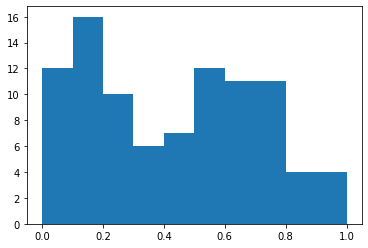

In [16]:
plt.hist(listofpercents, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [17]:
sum(listofpercents) / len(listofpercents)

0.4264515342842196

In [18]:
# joy percents for 2nd half
listofpercents = []
for i in range(3,96):
    filler = olderhalf[olderhalf.columns[i]].dropna()
    joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(olderhalf.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.7852760736196319
JOY        2048
DESPAIR     560
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.7442138866719872
JOY        1865
DESPAIR     641
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.11065111027474596
DESPAIR    2363
JOY         294
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9170750094232943
JOY        2433
DESPAIR     220
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.09665271966527196
DESPAIR    2159
JOY         231
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.1396769969445657
DESPAIR    1971
JOY         320
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.40649762282091917
DESPAIR    1498
JOY        1026
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.11362763915547025
DESPAIR    2309
JOY         296
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.24609

(array([13., 14., 12., 10., 10.,  7.,  7., 12.,  5.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

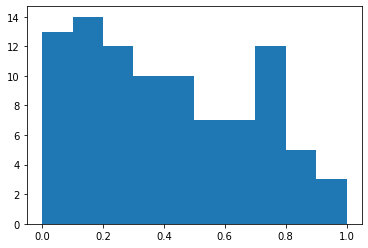

In [19]:
plt.hist(listofpercents, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [20]:
sum(listofpercents) / len(listofpercents)

0.4057811680868986

In [21]:
validages = dt[pd.to_numeric(dt['How old are you?'], errors='coerce').notnull()]
validages["How old are you?"] = validages["How old are you?"].astype(float) # about 5-6 answers have decimals

C:\Users\lowde\AppData\Local\Temp/ipykernel_25700/592849016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validages["How old are you?"] = validages["How old are you?"].astype(float) # about 5-6 answers have decimals


In [22]:
validages

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,10/23/2015 8:46:20,35.0,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/23/2015 8:46:52,41.0,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/23/2015 8:47:34,33.0,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/23/2015 8:47:59,31.0,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/23/2015 8:48:12,30.0,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10/31/2015 5:23:41,50.0,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5626,10/31/2015 5:29:27,43.0,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5627,10/31/2015 6:13:29,35.0,Yes,NaN,JOY,DESPAIR,JOY,NaN,NaN,DESPAIR,...,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5628,10/31/2015 6:26:53,38.0,No,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
type(validages["How old are you?"][0])

numpy.float64

In [59]:
try:
    x = 2/0
except:
    x = 2/2
x

1.0

In [61]:
why70s = validages[(validages['How old are you?'] <= 79) & (validages['How old are you?'] >= 70)]
listofpercents = []
joytotal = 0
joyanddespairtotal = 0
for i in range(3,96):
    filler = why70s[why70s.columns[i]].dropna()
    try: 
        joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
        joytotal += filler.value_counts()["JOY"]
    except:
        joyspercent = 0
        joytotal += 0
    joyanddespairtotal += sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(why70s.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.8333333333333334
JOY        20
DESPAIR     4
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6363636363636364
JOY        14
DESPAIR     8
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.09523809523809523
DESPAIR    19
JOY         2
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.8695652173913043
JOY        20
DESPAIR     3
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.18181818181818182
DESPAIR    18
JOY         4
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0
DESPAIR    18
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.05
DESPAIR    19
JOY         1
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.3181818181818182
DESPAIR    15
JOY         7
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.5263157894736842
JOY        10
DESPAIR     9
Name:  [Brach products (not including c

In [25]:
ages30to39 = validages[(validages['How old are you?'] <= 39) & (validages['How old are you?'] >= 30)]

In [26]:
# for people in their 30s
listofpercents = []
joytotal = 0
joyanddespairtotal = 0
for i in range(3,96):
    filler = ages30to39[ages30to39.columns[i]].dropna()
    joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
    joytotal += filler.value_counts()["JOY"]
    joyanddespairtotal += sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(ages30to39.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.8100922409115573
JOY        1493
DESPAIR     350
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6795166858457997
JOY        1181
DESPAIR     557
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.09612320764737121
DESPAIR    1702
JOY         181
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9397463002114165
JOY        1778
DESPAIR     114
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.061387354205033766
DESPAIR    1529
JOY         100
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.1615581098339719
DESPAIR    1313
JOY         253
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.4219977553310887
DESPAIR    1030
JOY         752
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.09714599341383096
DESPAIR    1645
JOY         177
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.21252

In [27]:
print(joytotal)
print(joyanddespairtotal)
print(joytotal/joyanddespairtotal)

70023
164515
0.42563292101024225


In [28]:
dt.columns[0]

'Timestamp'

In [29]:
#yes
trick = dt[dt.columns[2]]
trick.value_counts()["Yes"]/sum(trick.value_counts())

0.09431616341030195

In [30]:
# Joy occurence,
listofpercents = []
joytotal = 0
joyanddespairtotal = 0
for i in range(3,96):
    filler = dt[dt.columns[i]].dropna()
    joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
    joytotal += filler.value_counts()["JOY"]
    joyanddespairtotal += sum(filler.value_counts())
    listofpercents.append(joyspercent)
    print(dt.columns[i],joyspercent)
    print(filler.value_counts())
    print()

 [Butterfinger] 0.7869258623975605
JOY        4129
DESPAIR    1118
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6897868918375553
JOY        3431
DESPAIR    1543
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.10333833458364591
DESPAIR    4781
JOY         551
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9299458247711564
JOY        4978
DESPAIR     375
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.07307609398577279
DESPAIR    4300
JOY         339
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.12005395683453238
DESPAIR    3914
JOY         534
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.4096146205800556
DESPAIR    2972
JOY        2062
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.1115575966322235
DESPAIR    4643
JOY         583
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.225060

In [31]:
print(joytotal)
print(joyanddespairtotal)
print(joytotal/joyanddespairtotal)

197849
468510
0.4222940812362596


(array([12., 17., 12.,  6., 10.,  7., 12.,  8.,  6.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

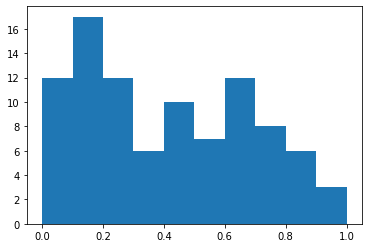

In [32]:
plt.hist(listofpercents, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]) # find another way to explain it/ use tier list

In [33]:
sum(listofpercents) / len(listofpercents) # On average,  about 41.6% of people said a given candy brings them joy, each candy weighted equally
# Only useful with the histogram above, DOES NOT REPRESENT THE RAW DATA

0.4162240061055227

In [34]:
type(dt['How old are you?'][36])

float

In [35]:
dt['Are you going actually going trick or treating yourself?'].nunique()

2

In [36]:
dt.shape #5630 * 124 the original

(5630, 124)

In [37]:
butter = dt[' [Butterfinger]'].dropna()
butter

0           JOY
1           JOY
2       DESPAIR
3           JOY
5           JOY
         ...   
5624    DESPAIR
5625    DESPAIR
5626        JOY
5628        JOY
5629    DESPAIR
Name:  [Butterfinger], Length: 5247, dtype: object

<AxesSubplot:>

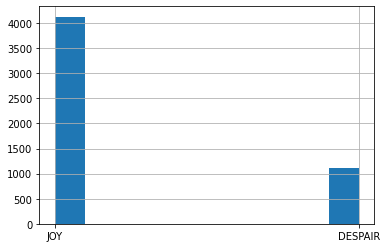

In [38]:
butter.hist()

In [39]:
butter.value_counts()

JOY        4129
DESPAIR    1118
Name:  [Butterfinger], dtype: int64

In [40]:
# joy occurence # DON'T USE INDEX 
butter.value_counts()[0]/sum(butter.value_counts())

0.7869258623975605

In [41]:
butter.value_counts()["JOY"]

4129

In [42]:
dt[' [Butterfinger]'].nunique()

2

In [43]:
NAamount = {}

dt.isna().sum()

Timestamp                                                                                           0
How old are you?                                                                                  199
Are you going actually going trick or treating yourself?                                            0
 [Butterfinger]                                                                                   383
 [100 Grand Bar]                                                                                  656
                                                                                                 ... 
Please estimate the degrees of separation you have from the following folks [Thom Yorke]         5630
Please estimate the degrees of separation you have from the following folks [JJ Abrams]          5630
Please estimate the degrees of separation you have from the following folks [Hillary Clinton]    5630
Please estimate the degrees of separation you have from the following folks [Donal

In [44]:
NAs = dt.isna().sum()
NAs.keys()[0]

'Timestamp'

In [45]:
for num in range(len(dt.isna().sum())):
    print(NAs.keys()[num],NAs[num])

Timestamp 0
How old are you? 199
Are you going actually going trick or treating yourself? 0
 [Butterfinger] 383
 [100 Grand Bar] 656
 [Anonymous brown globs that come in black and orange wrappers] 298
 [Any full-sized candy bar] 277
 [Black Jacks] 991
 [Bonkers] 1182
 [Bottle Caps] 596
 [Box’o’ Raisins] 404
 [Brach products (not including candy corn)] 698
 [Bubble Gum] 459
 [Cadbury Creme Eggs] 378
 [Candy Corn] 394
 [Vials of pure high fructose corn syrup, for main-lining into your vein] 561
 [Candy that is clearly just the stuff given out for free at restaurants] 366
 [Cash, or other forms of legal tender] 303
 [Chiclets] 508
 [Caramellos] 597
 [Snickers] 290
 [Dark Chocolate Hershey] 370
 [Dental paraphenalia] 336
 [Dots] 493
 [Fuzzy Peaches] 655
 [Generic Brand Acetaminophen] 532
 [Glow sticks] 460
 [Broken glow stick] 350
 [Goo Goo Clusters] 900
 [Good N' Plenty] 583
 [Gum from baseball cards] 444
 [Gummy Bears straight up] 430
 [Creepy Religious comics/Chick Tracts] 335
 [Healthy

In [46]:
def allnans(df):
    return df if type(df)==int else None

In [47]:
#dt['How old are you?'] = dt['How old are you?'].apply(allnans)
dt['How old are you?'] = dt['How old are you?'].dropna()
dt['How old are you?'].shape


(5630,)

In [48]:
dt['How old are you?'][57]

'enough'

In [49]:
ages = dt['How old are you?'].dropna()

In [50]:
ages.head()


0    35
1    41
2    33
3    31
4    30
Name: How old are you?, dtype: object

In [51]:
correctages = dt[pd.to_numeric(dt['How old are you?'], errors='coerce').notnull()]

In [52]:
correctages.shape

(5346, 124)

In [53]:
correctages = pd.to_numeric(correctages["How old are you?"])

In [54]:
serser = pd.to_numeric(correctages["How old are you?"])
serser.hist()

KeyError: 'How old are you?'

In [ ]:
correctages = correctages.to_frame()

In [ ]:
correctages

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0


9E+22
200587
2000
1880
490
400
388
350
350
123
120
115
108
100
100
100
99
99
97
85
77
75
75


In [ ]:
agesunder120 = correctages[correctages['How old are you?'] < 120]

In [ ]:
correctages

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0


In [ ]:
agesunder120

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0


array([[<AxesSubplot:title={'center':'How old are you?'}>]], dtype=object)

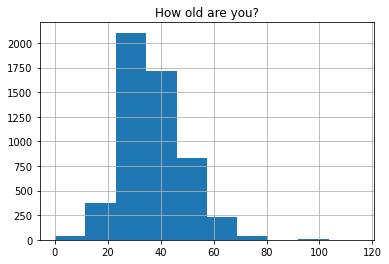

In [ ]:
agesunder120.hist() # cut off at 99

array([[<AxesSubplot:title={'center':'How old are you?'}>]], dtype=object)

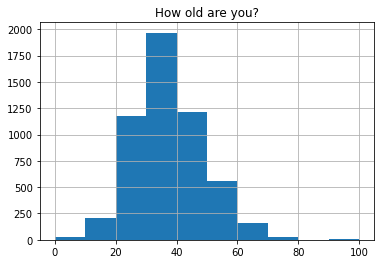

In [ ]:
agesunder120.hist(bins=[0,10,20,30,40,50,60,70,80,90,100])

In [ ]:
nooutlier = correctages[(correctages['How old are you?'] < 80) & (correctages['How old are you?'] > 1 )]

In [ ]:
nooutlier

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0


array([[<AxesSubplot:title={'center':'How old are you?'}>]], dtype=object)

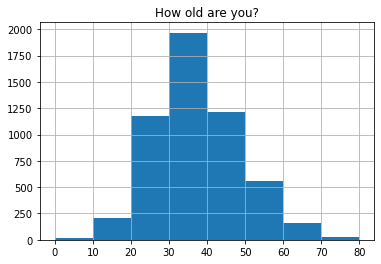

In [ ]:
nooutlier.hist(bins=[0,10,20,30,40,50,60,70,80])

In [ ]:
print("Mean: ", nooutlier.mean()) # SKEWS TO THE RIGHT BECAUSE MEAN > MEDIAN, A LOT MORE 50s THAN 10s, positive skew
print("Median: ",nooutlier.median())
print("Mode: ", nooutlier.mode())
print("Min,Max,Range? ",nooutlier.min(),nooutlier.max()) 
print("SD: ",nooutlier.std())
#print("IQR: ", nooutlier)
print(nooutlier.skew())


Mean:  How old are you?    36.78538
dtype: float64
Median:  How old are you?    35.0
dtype: float64
Mode:     How old are you?
0              35.0
Min,Max,Range?  How old are you?    5.0
dtype: float64 How old are you?    77.0
dtype: float64
SD:  How old are you?    11.255264
dtype: float64
How old are you?    0.453138
dtype: float64


In [ ]:
zscores = agesunder120
zscores['z_score']=stats.zscore(zscores['How old are you?'])

C:\Users\lowde\AppData\Local\Temp/ipykernel_16644/266382696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscores['z_score']=stats.zscore(zscores['How old are you?'])


In [ ]:
zscores['z_score']=stats.zscore(zscores['How old are you?'])

C:\Users\lowde\AppData\Local\Temp/ipykernel_16644/1136934107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscores['z_score']=stats.zscore(zscores['How old are you?'])


In [ ]:
zscores[]

SyntaxError: invalid syntax (Temp/ipykernel_16644/120880027.py, line 1)

In [ ]:
zscores.loc[zscores['z_score'].abs()>3]

,How old are you?,z_score
464,75.00,3.295659
680,74.00,3.209207
681,74.00,3.209207
888,72.00,3.036302
1130,99.00,5.370517
1279,72.00,3.036302
1287,72.00,3.036302
1561,77.00,3.468564
1564,74.00,3.209207
1569,75.00,3.295659


In [ ]:
correctages

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0
